# Метод ближайших соседей

Разберёмся как тренировать модели машинного обучения и, в частности, метод ближайших соседей в sklearn.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('wine.data.csv')
data[:5]

,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = data['Sort']
X = data.drop('Sort', axis=1)
X[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Разделим выборку на две части, чтобы было на чем проверять.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Метрика манхэттн

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNN
mistakes_manh = []
for neib_am in range(3, len(X_train)):
    clf = KNN(n_neighbors=neib_am, metric='manhattan')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mistakes_manh.append((y_pred != y_test).sum())

In [50]:
mistakes_mink = []
for neib_am in range(3, len(X_train)):
    clf = KNN(n_neighbors=neib_am, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mistakes_mink.append((y_pred != y_test).sum())

In [51]:
mistakes_maha = []
for neib_am in range(3, len(X_train)):
    clf = KNN(n_neighbors=neib_am, metric='chebyshev')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mistakes_maha.append((y_pred != y_test).sum())

Text(0,0.5,'mistakes')

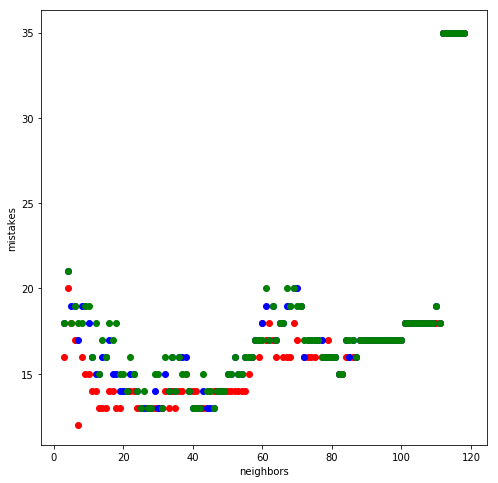

In [52]:
plt.figure(figsize=(8, 8))

plt.scatter(range(3, len(X_train)), mistakes_manh, color='red')
plt.scatter(range(3, len(X_train)), mistakes_mink, color='blue')
plt.scatter(range(3, len(X_train)), mistakes_maha, color='green')
plt.xlabel('neighbors')
plt.ylabel('mistakes')

Построим зависимость стандартного отклонения ошибки от объема выборки на обучение и контроле (проведем конкретно для метрики Минковского, иначе получится очень много однообразных действий)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [15]:
std_arr = []
mist_arr = []
for size in np.linspace(0.1, 0.8, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    clf = KNN(n_neighbors=27, metric='minkowski')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mist_arr.append((y_pred != y_test).sum())
    std_arr.append(np.std(y_pred != y_test))

Text(0,0.5,'mistakes')

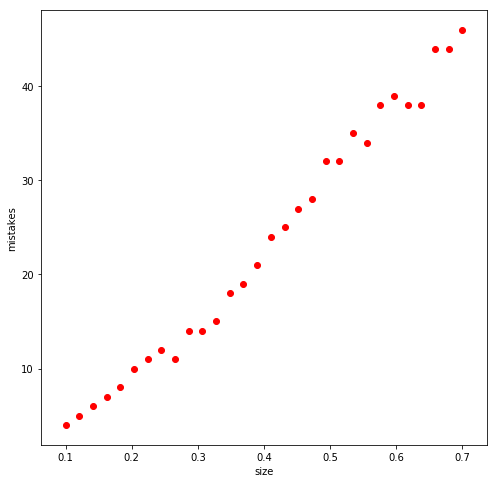

In [16]:
plt.figure(figsize=(8, 8))

plt.scatter(np.linspace(0.1, 0.7, 30), mist_arr, color='red')
plt.xlabel('size')
plt.ylabel('mistakes')

Text(0,0.5,'mistakes')

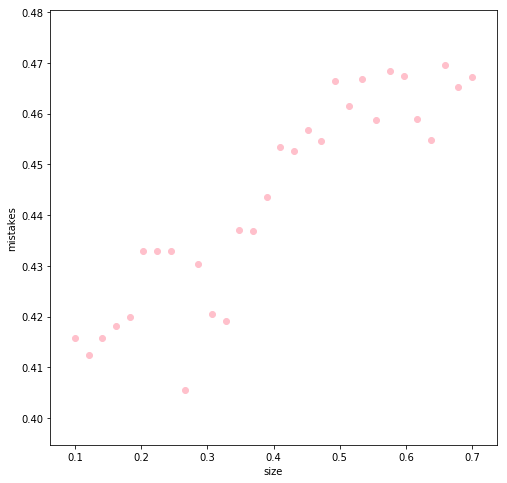

In [17]:
plt.figure(figsize=(8, 8))

plt.scatter(np.linspace(0.1, 0.7, 30), std_arr, color='pink')
plt.xlabel('size')
plt.ylabel('mistakes')

Больший размер тестовой выборки я брать не буду, он уже меньше оптимального размера соседей. На мой взгляд в графиках ничего неожиданного, больше тесты, меньше трейн, так как выборка маленькая ничего другого ждать не приходится.